# Outlier Naver DataLab Search
* 3-1-2. 급상승 음원 소셜미디어 관심도
    * naver_datalab/outlier/{title}_{artist}.xlsx
    * naver_datalab/outlier/{title}_{artist}.png

## 라이브러리

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, math

In [2]:
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [3]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False # 그래프에서 음수 표현 가능하도록 설정.

In [4]:
from selenium import webdriver
import chromedriver_autoinstaller as ca
import random, time

In [5]:
import shutil

## 날짜 설정

In [6]:
# 기간 설정
start_date = '2022-05-23'
end_date = '2022-05-29'

In [7]:
f_path = 'c:/data/Wantreez/Crawling/music'
try:
    os.chdir(f_path)
except:
    pass

In [8]:
code_path = os.getcwd().replace('\\', '/')
code_path

'c:/data/Wantreez/Crawling/music'

In [9]:
# 실시간 순위 파일 폴더로 이동
save_folder = f'crawled_data/outlier_data/{start_date}_{end_date}'
week_outlier_folder = os.path.join(code_path, save_folder)
week_outlier_folder

'c:/data/Wantreez/Crawling/music\\crawled_data/outlier_data/2022-05-23_2022-05-29'

In [10]:
file_list = os.listdir(week_outlier_folder)
file_list

['2022-05-23_2022-05-29_agency_in_chart.xlsx',
 '2022-05-23_2022-05-29_mean_outlier_agency.xlsx',
 '2022-05-23_2022-05-29_Top10_rank_change_df.xlsx',
 '2022-05-23_2022-05-29_Top50_100_rank_change_df.xlsx',
 '2022-05-23_2022-05-29_Top50_rank_change_df.xlsx',
 '2022-05-23_2022-05-29_total_outlier.png',
 '2022-05-23_2022-05-29_total_outlier.xlsx',
 '2022-05-23_Top100_ranks.xlsx',
 '2022-05-24_Top100_ranks.xlsx',
 '2022-05-25_Top100_ranks.xlsx',
 '2022-05-26_Top100_ranks.xlsx',
 '2022-05-27_Top100_ranks.xlsx',
 '2022-05-28_Top100_ranks.xlsx',
 '2022-05-29_Top100_ranks.xlsx',
 'bugs',
 'flo',
 'genie',
 'google_trend',
 'kakao_trend',
 'melon',
 'naver_datalab',
 'vibe',
 '[bugs]2022-05-23_2022-05-29_pop_df.xlsx',
 '[flo]2022-05-23_2022-05-29_pop_df.xlsx',
 '[genie]2022-05-23_2022-05-29_pop_df.xlsx',
 '[ky]2022-05-23_2022-05-29_pop_df.xlsx',
 '[melon]2022-05-23_2022-05-29_pop_df.xlsx',
 '[tj]2022-05-23_2022-05-29_pop_df.xlsx',
 '[vibe]2022-05-23_2022-05-29_pop_df.xlsx']

In [11]:
# 이상치 음원 파일 가져오기
for one in file_list:
    if 'total_outlier' in one:
        file_name = one
file_name

'2022-05-23_2022-05-29_total_outlier.xlsx'

In [12]:
outlier_path = os.path.join(week_outlier_folder, file_name)
df = pd.read_excel(outlier_path)
df

,날짜,순위변동평균(양수),곡,가수,소속사,순위,앨범,소속사_분류,순위변동,사이트
0,2022-05-25,99.0,물고기,백예린 (Yerin Baek),BLUEVINYL,1,물고기,기타,99,Bugs
1,2022-05-25,98.0,그게 나였네,백예린 (Yerin Baek),BLUEVINYL,2,물고기,기타,98,Bugs
2,2022-05-25,96.0,막내,백예린 (Yerin Baek),BLUEVINYL,4,물고기,기타,96,Bugs
3,2022-05-29,92.0,Break Away,WSG워너비 조별경연 (할미봉),MBC,8,WSG워너비 조별경연,기타,92,Bugs
4,2022-05-26,88.0,지금 난,오반,로맨틱팩토리,12,지금 난,기타,88,Bugs
5,2022-05-24,83.0,새벽에 핀 별 하나,청하,MH,17,붉은 단심 OST Part 4,기타,83,Bugs
6,2022-05-24,81.5,사랑의 결말은 모 아니면 도 (Yes Or No),원어스 (ONEUS),RBW,11,BLOOD MOON,RBW,89,Bugs
7,2022-05-26,70.0,지금 난,오반,로맨틱팩토리,30,지금 난,기타,70,Genie


## 3-1-2. 급상승 음원 소셜미디어 관심도(엑셀)

In [13]:
naver_datalab_path = f'crawled_data/outlier_data/{start_date}_{end_date}/naver_datalab/outliers'
des = os.path.join(code_path, naver_datalab_path)
des

'c:/data/Wantreez/Crawling/music\\crawled_data/outlier_data/2022-05-23_2022-05-29/naver_datalab/outliers'

In [14]:
os.makedirs(des, exist_ok=True)

### 다운로드 폴더 설정

In [15]:
# 다운로드 폴더, 파일 이름 설정
down_folder = 'C:/Users/kbjung/Downloads/'
down_xlsx = 'datalab.xlsx'

In [16]:
ca.install(True)
driver = webdriver.Chrome()

In [17]:
for i in range(df.shape[0]):
    # 네이버 데이터 랩 접속
    url = 'https://datalab.naver.com/keyword/trendSearch.naver'
    driver.get(url)
    driver.implicitly_wait(3)
    time.sleep( random.uniform(1, 1.5) )
    driver.maximize_window()

    # 검색어 입력
    word = df['곡'][i]
    search_box = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[1]/div[1]/input')
    search_box.clear()
    time.sleep( random.uniform(1, 1.5) )
    search_box.send_keys(word)

    # 1개월 picker 클릭
    time_picker = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[6]/div[1]/label[2]').click()
    time.sleep( random.uniform(1, 1.5) )

    # 검색 버튼 클릭
    search_button = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/a/span').click()
    time.sleep( random.uniform(1, 1.5) )
    driver.implicitly_wait(3)

    # 다운 버튼 클릭
    down_button = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div/div[1]/div[1]/div[1]/div/div/div/div/div/div[1]/div[4]/a').click()
    time.sleep( random.uniform(1, 1.5) )

    # 파일 이름 변경
    title = df['곡'][i]
    artist = df['가수'][i]
    new_down_xlsx = f'{title}_{artist}.xlsx'
    os.rename(down_folder + down_xlsx, down_folder + new_down_xlsx)

    # 파일 이동
    new_down_path = os.path.join(des, new_down_xlsx)
    shutil.move(down_folder + new_down_xlsx, new_down_path)
    print(f'{new_down_xlsx} 완료.')

C:\Users\kbjung\AppData\Local\Temp/ipykernel_11420/4118031146.py:11: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  search_box = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[1]/div[1]/input')
C:\Users\kbjung\AppData\Local\Temp/ipykernel_11420/4118031146.py:17: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  time_picker = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[6]/div[1]/label[2]').click()
C:\Users\kbjung\AppData\Local\Temp/ipykernel_11420/4118031146.py:21: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  search_button = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/a/span').click()
C:\Users\kbjung\AppData\L

물고기_백예린 (Yerin Baek).xlsx 완료.
그게 나였네_백예린 (Yerin Baek).xlsx 완료.
막내_백예린 (Yerin Baek).xlsx 완료.
Break Away_WSG워너비 조별경연 (할미봉).xlsx 완료.
지금 난_오반.xlsx 완료.
새벽에 핀 별 하나_청하.xlsx 완료.
사랑의 결말은 모 아니면 도 (Yes Or No)_원어스 (ONEUS).xlsx 완료.
지금 난_오반.xlsx 완료.


In [18]:
driver.quit()

## 이상치 노래 그래프(테스트)

In [19]:
outlier_file_list = os.listdir(des)
outlier_file_list

['Break Away_WSG워너비 조별경연 (할미봉).xlsx',
 '그게 나였네_백예린 (Yerin Baek).xlsx',
 '막내_백예린 (Yerin Baek).xlsx',
 '물고기_백예린 (Yerin Baek).xlsx',
 '사랑의 결말은 모 아니면 도 (Yes Or No)_원어스 (ONEUS).xlsx',
 '새벽에 핀 별 하나_청하.xlsx',
 '지금 난_오반.xlsx']

In [20]:
one = outlier_file_list[3]
title = one.split('_')[0]
artist = one.split('_')[1]
one_path = os.path.join(des, one)
temp = pd.read_excel(one_path).reset_index(drop=True)
temp = temp.iloc[6:, :].reset_index(drop=True)
temp.columns = ['날짜', '검색비율']
temp.head()

C:\Users\kbjung\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,날짜,검색비율
0,2022-04-29,39.17481
1,2022-04-30,42.62016
2,2022-05-01,41.00382
3,2022-05-02,37.00552
4,2022-05-03,35.26159


In [21]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      31 non-null     object
 1   검색비율    31 non-null     object
dtypes: object(2)
memory usage: 624.0+ bytes


In [22]:
week_temp = temp[ (temp['날짜'] >= start_date) & (temp['날짜'] <= end_date)].reset_index(drop=True)
week_temp['검색비율'] = week_temp['검색비율'].astype(float)
week_temp['검색비율'] = round(week_temp['검색비율'], 1)
week_temp

,날짜,검색비율
0,2022-05-23,44.3
1,2022-05-24,87.7
2,2022-05-25,100.0
3,2022-05-26,79.7
4,2022-05-27,68.8
5,2022-05-28,61.7
6,2022-05-29,61.5


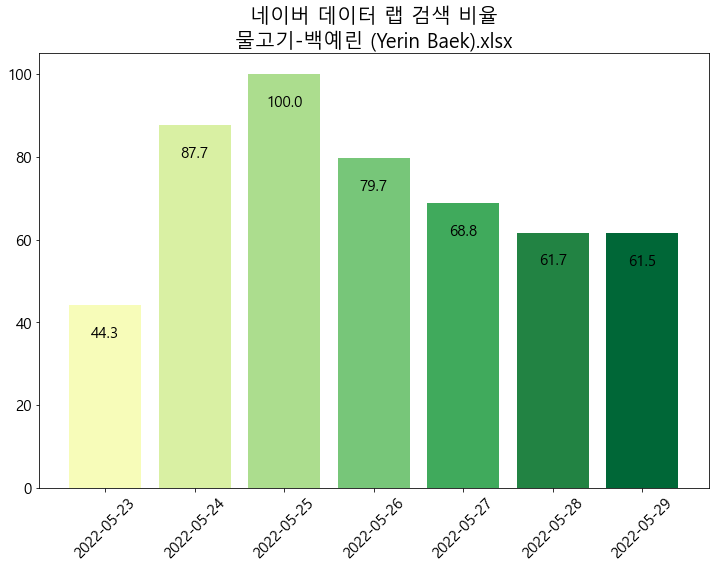

In [23]:
colors = sns.color_palette('YlGn', week_temp.shape[0])
x = week_temp['날짜']
y = week_temp['검색비율']
try:
        interval_ratio = math.ceil( max(y) )*0.05
        interval_ratio2 = math.ceil( max(y) )*0.2
        plt.figure( figsize=(12,8) )
        plt.bar(x, y, color=colors)
        plt.title(f"네이버 데이터 랩 검색 비율\n{title}-{artist}", fontsize=20)
        plt.xticks(fontsize=15,rotation=45)
        plt.yticks(fontsize=15)
        for i in range( len(y) ):
                if y[i] <= interval_ratio2:
                        plt.text(x[i], y[i]+interval_ratio, round(y[i],1), fontsize=15, color='black',
                        horizontalalignment='center',
                        verticalalignment='bottom')
                else:
                        plt.text(x[i], y[i]-interval_ratio, round(y[i],1), fontsize=15, color='black',
                        horizontalalignment='center',
                        verticalalignment='top')
except:
        pass

## 3-1-2. 급상승 음원 소셜미디어 관심도(그래프)

In [29]:
for one in outlier_file_list:
    title = one.split('_')[0]
    artist = one.split('_')[1].split('.')[0]
    two = one.split('_')[1].split('.')
    if len(two) > 2:
        temp = one.split('_')[1].replace('.', '[point]', len(two) - 2)
        artist = temp.split('.')[0].replace('[point]', '.')

    one_path = os.path.join(des, one)
    temp = pd.read_excel(one_path).reset_index(drop=True)
    temp = temp.iloc[6:, :].reset_index(drop=True)
    temp.columns = ['날짜', '검색비율']

    week_temp = temp[ (temp['날짜'] >= start_date) & (temp['날짜'] <= end_date)].reset_index(drop=True)
    week_temp['검색비율'] = week_temp['검색비율'].astype(float)
    week_temp['검색비율'] = round(week_temp['검색비율'], 1)
    
    colors = sns.color_palette('YlGn', week_temp.shape[0])
    x = week_temp['날짜']
    y = week_temp['검색비율']
    try:
        interval_ratio = math.ceil( max(y) )*0.05
        interval_ratio2 = math.ceil( max(y) )*0.2
        plt.figure( figsize=(12,8) )
        plt.bar(x, y, color=colors)
        plt.title(f"네이버 데이터 랩 검색 비율\n{title}-{artist}", fontsize=20)
        plt.xticks(fontsize=15,rotation=45)
        plt.yticks( fontsize=15)
        for i in range( len(y) ):
                if y[i] <= interval_ratio2:
                    plt.text(x[i], y[i]+interval_ratio, round(y[i],1), fontsize=15, color='black',
                            horizontalalignment='center',
                            verticalalignment='bottom')
                else:
                    plt.text(x[i], y[i]-interval_ratio, round(y[i],1), fontsize=15, color='black',
                            horizontalalignment='center',
                            verticalalignment='top')
        file_name2 = f'{title}_{artist}.png'
        save_img_path = os.path.join(des, file_name2)
        plt.savefig(save_img_path)
        plt.close()
        print(f'{file_name2} 저장 완료.')
    except:
        pass

C:\Users\kbjung\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Break Away_WSG워너비 조별경연 (할미봉).png 저장 완료.
그게 나였네_백예린 (Yerin Baek).png 저장 완료.
막내_백예린 (Yerin Baek).png 저장 완료.
물고기_백예린 (Yerin Baek).png 저장 완료.
사랑의 결말은 모 아니면 도 (Yes Or No)_원어스 (ONEUS).png 저장 완료.
새벽에 핀 별 하나_청하.png 저장 완료.
지금 난_오반.png 저장 완료.


# 코드 마지막